In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# SIRD模型


def sird_model(y, t, beta, gamma, mu):
    S, I, R, D = y
    N = S + I + R + D
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return [dSdt, dIdt, dRdt, dDdt]


# 定义参数字典

arg_dict = {
    'β': [(i, 0.1, 0.015) for i in [0.2, 0.3, 0.4]],
    'γ': [(0.3, i, 0.015) for i in [0.05, 0.1, 0.15]],
    'μ': [(0.3, 0.1, i) for i in [0.01, 0.015, 0.02]],
}

arg_indxes = {
    'β': 0,
    'γ': 1,
    'μ': 2,
}



In [3]:
def plot_diffs(改变的参数):    
    mut_args = arg_dict[改变的参数]


    # 初始条件和时间点
    t = np.linspace(0, 140, 140)  # 时间点
    y0 = [999, 1, 0, 0]  # 初始易感、感染、康复和死亡人数

    # 创建四个subplots,分别显示易感者、感染者、康复者、死亡者在不同 β 下的变化曲线
    fig, axes = plt.subplots(2, 2,figsize=(12,8),tight_layout=True)

    # 绘制不同参数下的 SIRD 模型曲线

    for arg in mut_args:
        solution = odeint(sird_model, y0, t, args=arg)
        # S, I, R, D = solution.T
        for i,Y in enumerate(solution.T):
            axes[i//2,i%2].plot(t, Y, label=f'{改变的参数}={arg[arg_indxes[改变的参数]]}')

    for ax in axes.flatten():
        ax.set_xlabel('时间', fontsize=12)
        # ax.set_ylabel('人数', fontsize=12)
        ax.grid(True, axis='y')
        ax.legend(loc='best')

    # 设置子图标题
    axes[0, 0].set_ylabel('易感者数量', fontsize=14)
    axes[0, 1].set_ylabel('感染者数量', fontsize=14)
    axes[1, 0].set_ylabel('康复者数量', fontsize=14)
    axes[1, 1].set_ylabel('死亡者数量', fontsize=14)

    fig.suptitle('SIRD 模型不同'+改变的参数+' 下的变化曲线', fontsize=14)

    plt.show()

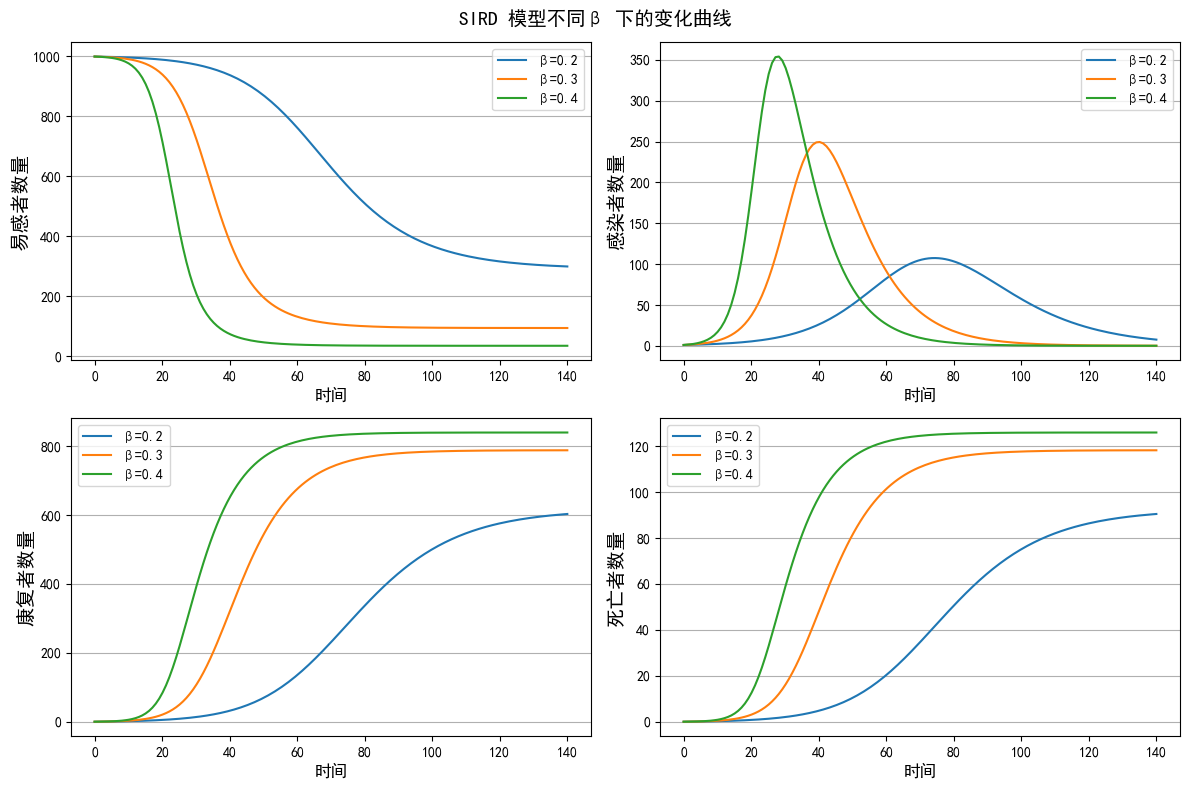

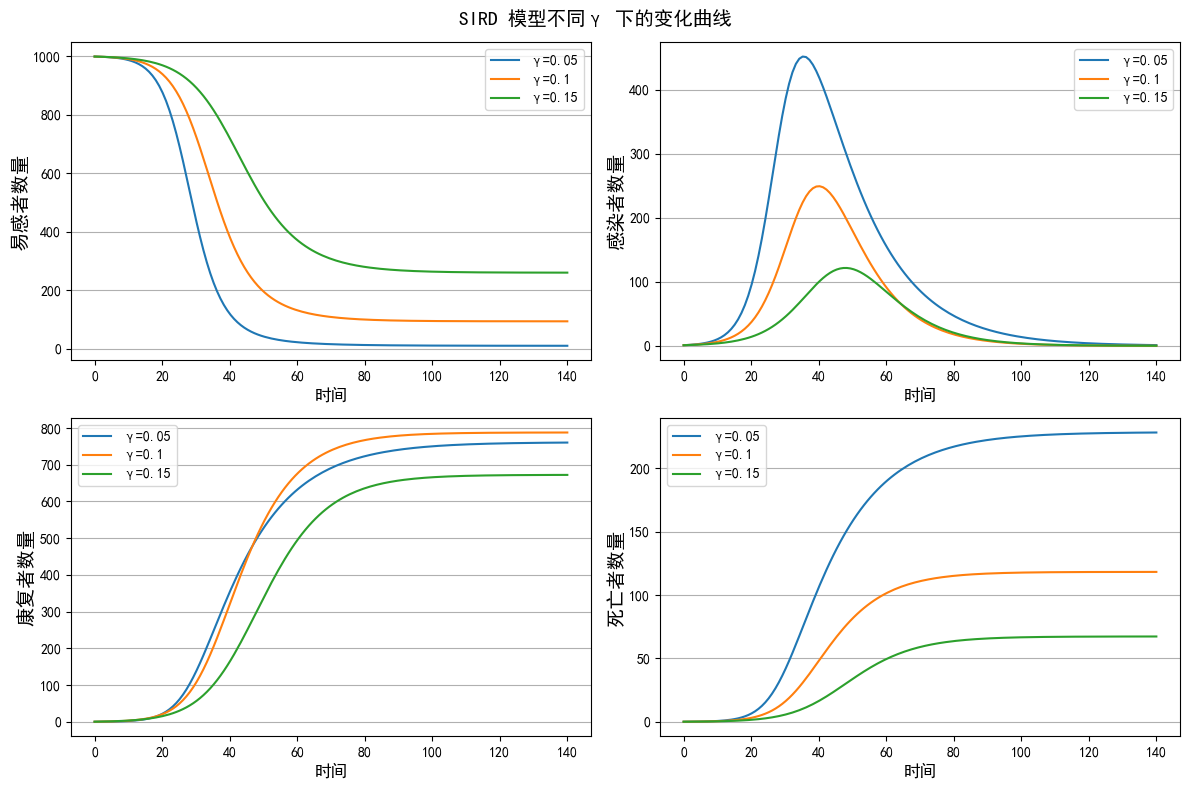

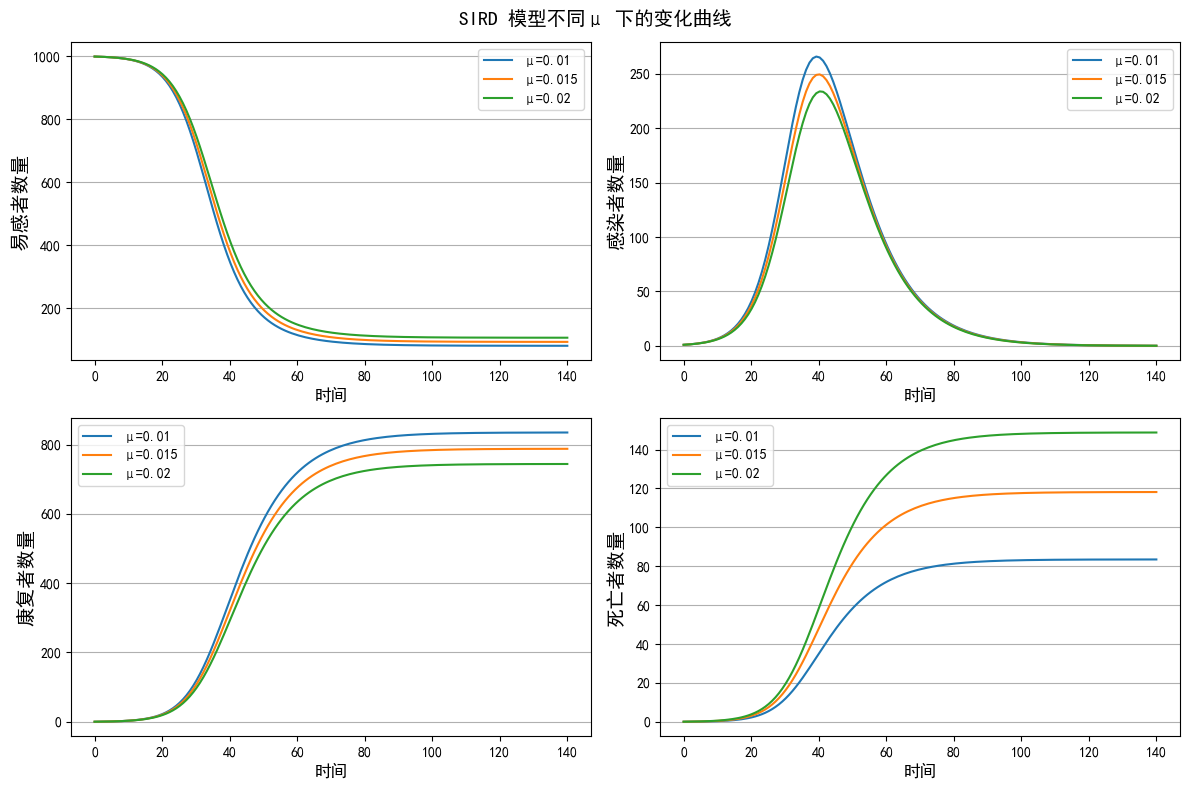

In [4]:

# 选择要研究的参数
for i in ['β', 'γ', 'μ']:
    plot_diffs(改变的参数 = i ) # 选择要改变的参数



Text(0.5, 1.0, 'γ 与 R(max) 关系')

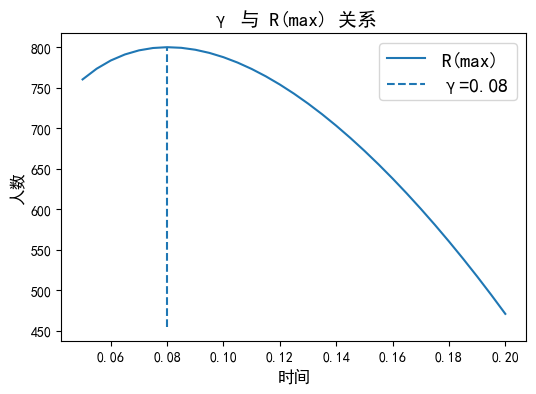

In [34]:


plt.figure(num=None, figsize=(6, 4), dpi=100, facecolor='w', edgecolor='k')

# 初始条件和时间点
t = np.linspace(0, 140, 140)  # 时间点
y0 = [999, 1, 0, 0]  # 初始易感、感染、康复和死亡人数

# 创建四个subplots,分别显示易感者、感染者、康复者、死亡者在不同 β 下的变化曲线
# fig, axes = plt.subplots(2, 2,figsize=(12,8),tight_layout=True)

# 绘制不同参数下的 SIRD 模型曲线

gamma = np.arange(0.05, 0.2, 0.005)

R_max = []

for arg in [(0.30,i,0.015) for i in gamma]:
    solution = odeint(sird_model, y0, t, args=arg)
    S, I, R, D = solution.T
    R_max.append(max(R))
    # plt.plot(t, R, label=f"S(gamma={arg[1]:.3f})")

plt.plot(gamma, R_max, label="R(max)")

# 找到r_max最大值对应的γ
r_max = max(R_max)
gamma_max = gamma[R_max.index(r_max)]

plt.vlines(gamma_max, plt.ylim()[0], r_max, linestyles="dashed", label=f"γ={gamma_max:.2f}")

plt.legend(fontsize=14)
plt.xlabel("时间", fontsize=12)
plt.ylabel("人数", fontsize=12)
plt.title("γ 与 R(max) 关系", fontsize=14)